# Data



In [1]:
!unzip -q /content/lab.zip -d /content/

In [2]:
# !unzip -q /content/dataset_v3.zip -d /content/dataset/

In [3]:
# !unzip -q /content/imgs.zip -d /content/imgs/

In [4]:
# !rm -r /content/sample_data/
!rm -r /content/review/
!mkdir /content/review/
!rm -r /content/validation/
!mkdir /content/validation/
# !rm -r /content/dataset/


# Imports

In [5]:
!pip install -q tensorflowjs
import tensorflowjs as tfjs

In [6]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D,LayerNormalization,AveragePooling2D,BatchNormalization
from keras.optimizers import Adam #, RMSprop, SGD, Nadam, Adadelta, Adagrad, Adamax, Ftrl
from keras.preprocessing.image import ImageDataGenerator

from dataset_load_v3 import load_data, get_label, load_images

In [7]:
(X_train, Y_train), (X_test, Y_test)= load_data(test_size = 0.3, path='/content/dataset/')

0 tiene 4000
1 tiene 4000
2 tiene 4000
Barajando
Repartiendo
Random State: 1606583485


1606155704

1606156141

1606156684

1606410266

1606583485

1606768060

1606768320

1606781780

1606826233


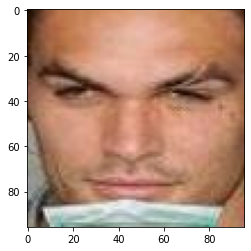

In [8]:
plt.imshow(X_train[0])

# Our CNN model

In [9]:
dim = [96,96,3]

# modelo = Sequential()
# #(None,96,96,3)
# modelo.add(Conv2D(input_shape=dim,filters=16,kernel_size=(9,9),padding='same',activation='relu'))
# modelo.add(MaxPooling2D())

# modelo.add(Conv2D(input_shape=dim,filters=32,kernel_size=(7,7),padding='same',activation='relu'))
# modelo.add(MaxPooling2D())
# modelo.add(BatchNormalization())

# modelo.add(Conv2D(input_shape=dim,filters=64,kernel_size=(7,7),padding='same',activation='relu'))
# modelo.add(AveragePooling2D())

# modelo.add(Conv2D(input_shape=dim,filters=128,kernel_size=(5,5),padding='same',activation='relu'))
# modelo.add(MaxPooling2D())

# modelo.add(Conv2D(filters=256,kernel_size=(3,3), padding='same',activation='relu'))
# modelo.add(AveragePooling2D())

# #(None,3,3,256)
# modelo.add(Flatten())#2304
# modelo.add(Dense(units=512, activation='relu'))
# modelo.add(Dropout(0.6))
# modelo.add(Dense(units=3, activation='softmax'))
# modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 16)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        25120     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        100416    
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 64)        0

# MobilNetV2

In [10]:
from keras.models import Model
from keras.layers import Dense,Flatten
import tensorflow as tf
import keras 

# Estas son las apps que mejor funcionan de las que trae keras 
#MobileNet , MobileNetV2 , Xception, InceptionV3

mobile = keras.applications.MobileNetV2(
    input_shape=dim,
    include_top=False,
    weights="imagenet"
)

flatten = Flatten()
new_layer = Dense(3, activation='softmax', name='my_dense')

inp = mobile.input
out = new_layer(flatten(mobile.output)) 
            
modelo = Model(inp, out)

# modelo.summary(line_length=150)



## Data Augmentation



In [11]:

datagen = ImageDataGenerator(
    rotation_range=30,
    fill_mode='nearest',
    rescale=1./255,
    brightness_range=[0.4,1.6],
    horizontal_flip=True,
    validation_split=0.2,
    dtype='float32'
  )

X_test = X_test/255.
it_training = datagen.flow(X_train, Y_train, batch_size=15,subset='training', save_to_dir ='/content/review/', save_format ='jpg')#, save_to_dir ='/content/review/', save_format ='jpg'
it_validation = datagen.flow(X_train, Y_train, batch_size=5,subset='validation', save_to_dir ='/content/validation/', save_format ='jpg')

# images = it.next()
# plt.imshow(images[0][0])
# images[0][0]

## Check Image Generate


In [12]:
images_train = it_training.next()
ind = -1

In [ ]:
ind = (ind+1)%15
plt.imshow(images_train[0][ind])
plt.show()
print(get_label(images_train[1][ind]))
print(images_train[0][ind])


# Train


In [14]:
epocas =15
bs = 15
lr = 0.0001
#Estos son los optim que mejor funciona. Adadelta es lenta avanza muy poco en cada paso. Nadam, avanza más rapido pero es más inestable
optim = Adam(lr) # Nadam, Adadelta
modelo.compile(loss = 'categorical_crossentropy',optimizer=optim,metrics=['accuracy'])

In [15]:
historico = modelo.fit(it_training, batch_size=bs,epochs=epocas, validation_data=it_validation)


Epoch 1/15
448/448 [==============================] - 29s 64ms/step - loss: 0.4663 - accuracy: 0.8257 - val_loss: 0.3869 - val_accuracy: 0.9024
Epoch 2/15
448/448 [==============================] - 28s 64ms/step - loss: 0.2776 - accuracy: 0.9051 - val_loss: 0.3073 - val_accuracy: 0.8857
Epoch 3/15
448/448 [==============================] - 28s 62ms/step - loss: 0.2102 - accuracy: 0.9284 - val_loss: 0.2100 - val_accuracy: 0.9262
Epoch 4/15
448/448 [==============================] - 28s 62ms/step - loss: 0.1766 - accuracy: 0.9411 - val_loss: 0.2191 - val_accuracy: 0.9149
Epoch 5/15
448/448 [==============================] - 28s 62ms/step - loss: 0.1523 - accuracy: 0.9476 - val_loss: 0.2040 - val_accuracy: 0.9292
Epoch 6/15
448/448 [==============================] - 28s 61ms/step - loss: 0.1408 - accuracy: 0.9478 - val_loss: 0.1504 - val_accuracy: 0.9500
Epoch 7/15
448/448 [==============================] - 28s 61ms/step - loss: 0.1239 - accuracy: 0.9542 - val_loss: 0.1600 - val_accuracy:

In [16]:
# historico = modelo.fit(X_train, Y_train, epochs=epocas,batch_size=bs, validation_split=0.2)#, callbacks=[checkpoint]


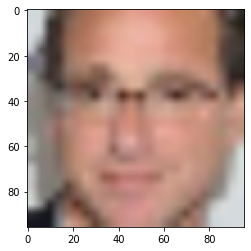

In [17]:
plt.imshow(X_test[0])

# Metrics

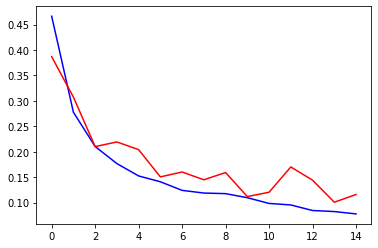

In [18]:
plt.plot(historico.history['loss'],c='b')
plt.plot(historico.history['val_loss'],c='r')
plt.show()

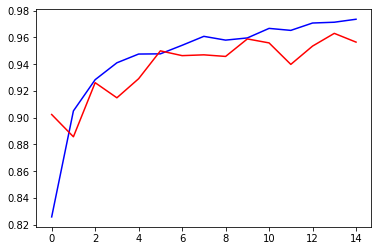

In [19]:
plt.plot(historico.history['accuracy'],c='b')
plt.plot(historico.history['val_accuracy'],c='r')
plt.show()

In [20]:
metricas = modelo.evaluate(X_test,Y_test,verbose=0)
print("Accuracy {:5.3}".format(metricas[1]))


Accuracy  0.97


# Show predictions

'with_mask'

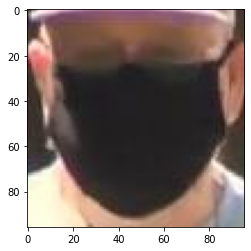

In [21]:
import random
ind = random.randint(0,X_test.shape[0]-1)
plt.imshow(X_test[ind])
get_label(modelo.predict(X_test[ind].reshape(1,dim[0],dim[1],3)))

In [22]:
ind

2824

Data Analysis

In [23]:

fails_arr = [
         [0,0,0],
         [0,0,0],
         [0,0,0]
        ]
fails = []
total = [0,0,0]

i=0

Y_p = modelo.predict(X_test)
conj = zip(Y_p.argmax(axis=1),Y_test.argmax(axis=1))

for y_p,y in conj:
  total[y] = total[y] + 1
  fails_arr[y][y_p] = fails_arr[y][y_p] +1

  if y_p != y:
    fails.append(i)

  i +=1

fails = np.array(fails)

## Confusion Matrix

In [24]:
print("WI\tWO\tWR\t")
print("{}\t{}\t{}\tWI".format(fails_arr[0][0],fails_arr[0][1],fails_arr[0][2]))
print("{}\t{}\t{}\tWO".format(fails_arr[1][0],fails_arr[1][1],fails_arr[1][2]))
print("{}\t{}\t{}\tWR".format(fails_arr[2][0],fails_arr[2][1],fails_arr[2][2]))


WI	WO	WR	
1119	39	16	WI
6	1187	8	WO
25	14	1186	WR


In [25]:
current_accuracy = round(1-(fails.shape[0]/X_test.shape[0]),3)
print('Accuracy {:3.3f}'.format(1-(fails.shape[0]/X_test.shape[0])))
print('Size {}/{}'.format(fails.shape[0],X_test.shape[0] ))


Accuracy 0.970
Size 108/3600


## Show fails

In [26]:
i=-1

0


'without_mask'

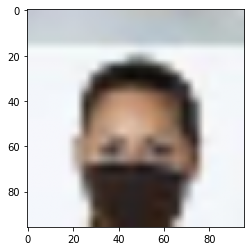

In [27]:
# import random
i = (i+1)%fails.shape[0]
# ind = random.randint(0,fails.shape[0]-1)
print(i)
plt.imshow(X_test[fails[i]])
get_label(modelo.predict(X_test[fails[i]].reshape(1,dim[0],dim[1],3)))


# Save Models


In [28]:
modelo.save('./last.h5', include_optimizer=False)
modelo.save('./{}.h5'.format(str(current_accuracy)), include_optimizer=False)


In [29]:
modelo.save('./last_complete.h5')
modelo.save('./{}_complete.h5'.format(str(current_accuracy)))


In [30]:
tfjs.converters.save_keras_model(modelo, '/content/')

# Practica


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from dataset_load_v3 import get_label,get_dicc


In [36]:
prototxtPath = os.path.sep.join(["./", "deploy.prototxt"])
weightsPath = os.path.sep.join(["./",
"res10_300x300_ssd_iter_140000.caffemodel"])
net = cv2.dnn.readNet(prototxtPath, weightsPath)

In [37]:

def show(image_path):
    # image_path = "./imgs/1.jpg"
    model = tf.keras.models.load_model('./last.h5')


    image = cv2.imread(image_path)
    orig = image.copy()
    (h, w) = image.shape[:2]
    # construct a blob from the image
    blob = cv2.dnn.blobFromImage(image, 1.0, (530, 530), #300,300
        (104.0, 177.0, 123.0))

    # pass the blob through the network and obtain the face detections
    net.setInput(blob)
    detections = net.forward()

    # loop over the detections
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with
        # the detection
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the confidence is
        # greater than the minimum confidence
        if confidence > 0.20:
            # compute the (x, y)-coordinates of the bounding box for
            # the object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # ensure the bounding boxes fall within the dimensions of
            # the frame
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
            if (endY-startY)>10 and (endX-startX)>10:
                x_face = []
                face = image[startY:endY, startX:endX]
                face = cv2.resize(face, (dim[0],dim[1]))
                face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

                face = face/255.
                x_face.append(face)
                x_face = np.array(x_face)

                # pass the face through the model to determine if the face
                # has a mask or not
                
                predicted_y = model.predict(x_face.reshape(-1,dim[0],dim[1],3))
                print(predicted_y)

                predicted_y = np.argmax(predicted_y)
                print(predicted_y)


                dicc = get_dicc()
                print(dicc[predicted_y])
                category_colors = {0: (0, 255, 0), 1: (0, 0, 255), 2: (255, 0, 0)}

                cv2.rectangle(image, (startX, startY), (endX, endY), category_colors[predicted_y], 2)
            
    plt.figure(figsize=(12,12))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

[[9.9999821e-01 1.9118104e-07 1.5517339e-06]]
0
with_mask
[[9.9998760e-01 5.8563018e-07 1.1767768e-05]]
0
with_mask
[[9.9999964e-01 2.4543834e-09 3.4783437e-07]]
0
with_mask


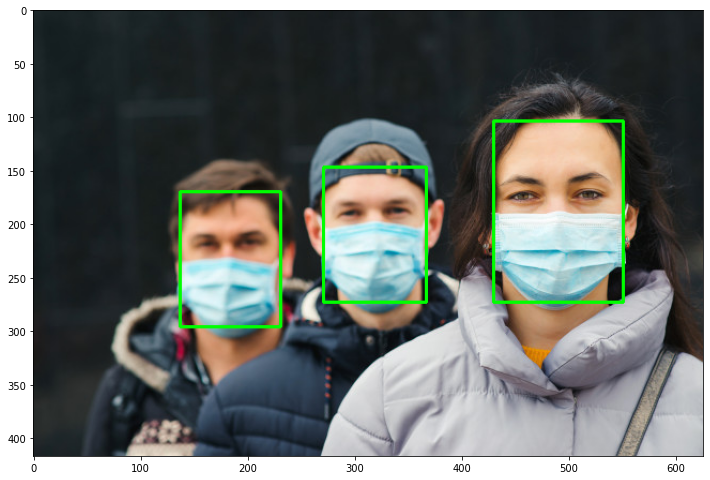

In [38]:
show("./imgs/1.jpg")

[[9.7383887e-01 4.3648126e-04 2.5724629e-02]]
0
with_mask
[[0.03567387 0.90288794 0.06143824]]
1
without_mask
[[7.9806676e-05 9.9888510e-01 1.0351019e-03]]
1
without_mask


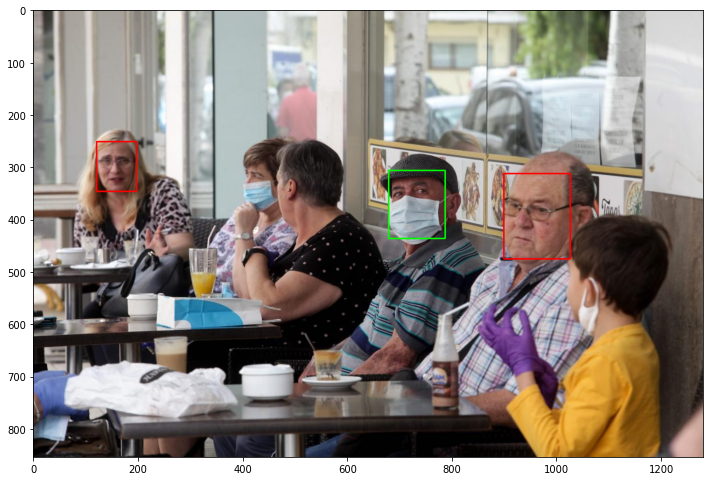

In [39]:
show("./imgs/2.jpg")

[[9.9961334e-01 2.0906952e-04 1.7764003e-04]]
0
with_mask
[[1.2541689e-03 9.9788111e-01 8.6466165e-04]]
1
without_mask
[[9.9998415e-01 1.5106106e-06 1.4359417e-05]]
0
with_mask
[[0.586078   0.2509023  0.16301972]]
0
with_mask
[[9.9999976e-01 8.9956629e-08 6.2450219e-08]]
0
with_mask
[[9.999939e-01 8.490726e-08 6.005859e-06]]
0
with_mask
[[0.35768938 0.41148528 0.23082529]]
1
without_mask
[[1.0000000e+00 4.0877257e-09 1.1721145e-08]]
0
with_mask
[[9.99290228e-01 1.09548826e-04 6.00136991e-04]]
0
with_mask
[[9.9954307e-01 3.1475720e-05 4.2545443e-04]]
0
with_mask
[[9.9904543e-01 1.7850701e-04 7.7599986e-04]]
0
with_mask
[[0.9612689  0.03501477 0.00371629]]
0
with_mask
[[0.9892602  0.00431817 0.00642153]]
0
with_mask
[[0.99496007 0.00340356 0.00163629]]
0
with_mask
[[0.9893084  0.0047492  0.00594232]]
0
with_mask
[[9.9868804e-01 1.1846577e-04 1.1934994e-03]]
0
with_mask
[[9.997265e-01 1.842048e-04 8.927761e-05]]
0
with_mask
[[0.980057   0.01391369 0.00602918]]
0
with_mask


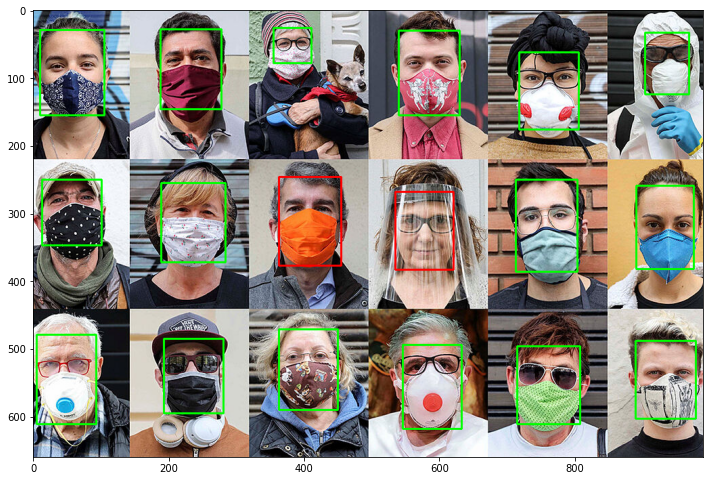

In [40]:
show("./imgs/3.jpg")

[[9.9999797e-01 3.1020893e-08 2.0044818e-06]]
0
with_mask
[[9.9990201e-01 3.0405928e-07 9.7637501e-05]]
0
with_mask
[[9.9570316e-01 9.9839010e-05 4.1970084e-03]]
0
with_mask
[[9.9824959e-01 1.4594918e-05 1.7357650e-03]]
0
with_mask


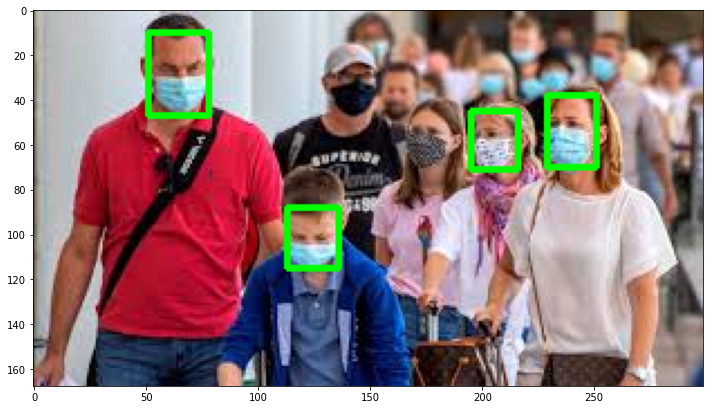

In [41]:
show("./imgs/4.jpg")

[[9.99890089e-01 8.21920082e-07 1.09060806e-04]]
0
with_mask
[[0.02279789 0.9720171  0.00518499]]
1
without_mask
[[0.0023793  0.9922925  0.00532816]]
1
without_mask
[[1.2321775e-04 9.9961555e-01 2.6120717e-04]]
1
without_mask
[[0.03178551 0.89980024 0.06841432]]
1
without_mask
[[0.5992758  0.37950486 0.02121929]]
0
with_mask
[[0.7123443  0.24694706 0.04070864]]
0
with_mask
[[0.31756222 0.58968025 0.09275745]]
1
without_mask


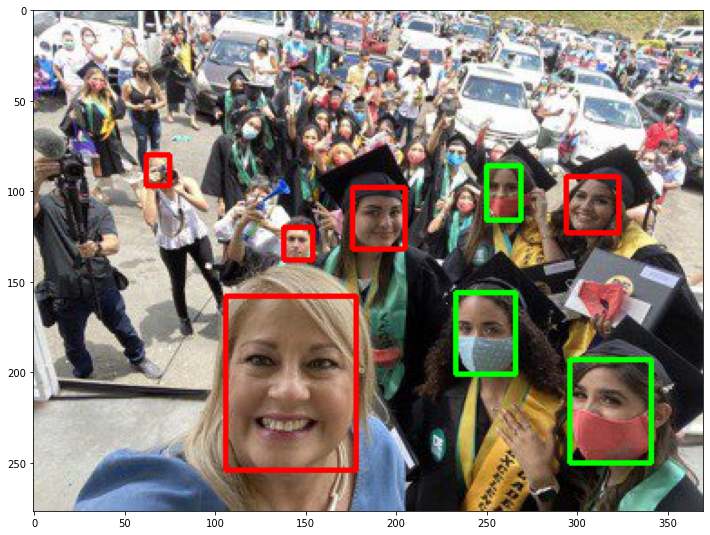

In [42]:
show("./imgs/5.jpg")

[[9.9999905e-01 4.7662319e-09 9.5454777e-07]]
0
with_mask
[[1.8200120e-04 4.3950686e-01 5.6031114e-01]]
2
wrong_mask
[[9.9998677e-01 4.2872966e-07 1.2718011e-05]]
0
with_mask


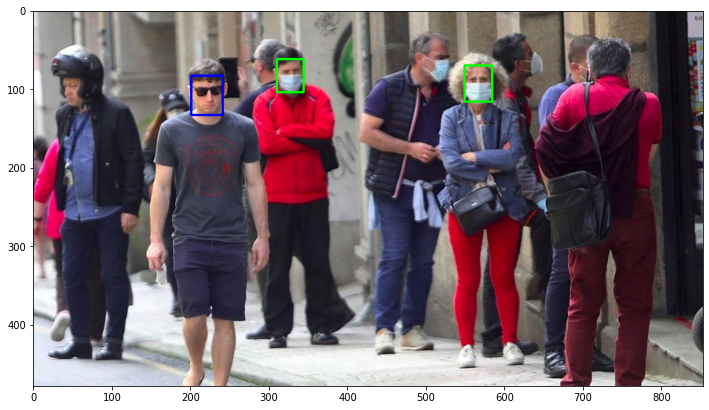

In [43]:
show("./imgs/6.jpg")

[[0.84243435 0.0554854  0.10208029]]
0
with_mask
[[0.98875976 0.01010279 0.00113744]]
0
with_mask


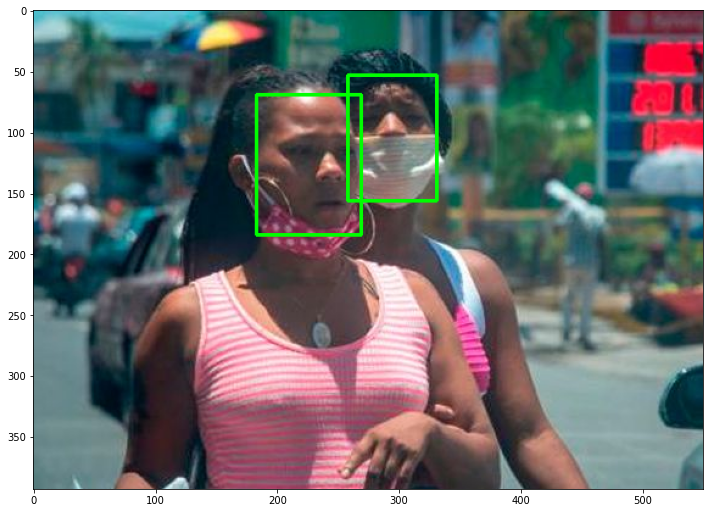

In [44]:
show("./imgs/7.jpg")

[[9.9848735e-01 1.0279421e-06 1.5114894e-03]]
0
with_mask
[[9.9110293e-01 8.7637098e-05 8.8093998e-03]]
0
with_mask
[[0.0884639  0.29828674 0.61324936]]
2
wrong_mask
[[9.9991953e-01 8.8538116e-07 7.9590398e-05]]
0
with_mask


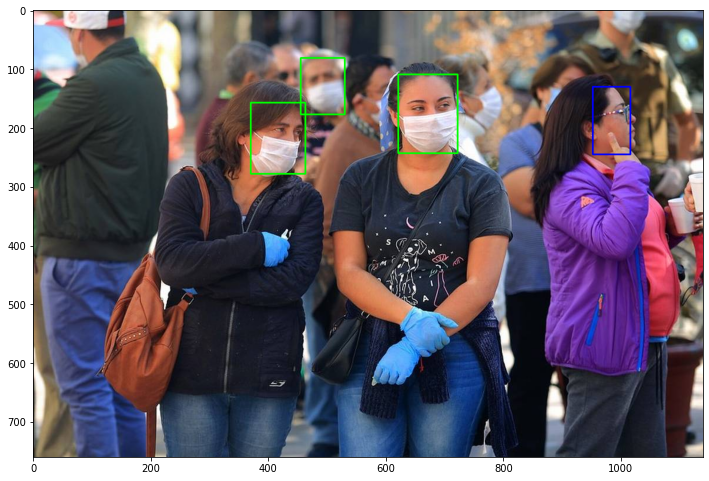

In [45]:
show("./imgs/8.jpg")

[[0.00303223 0.9609888  0.03597893]]
1
without_mask
[[9.9999642e-01 2.8018866e-07 3.3079989e-06]]
0
with_mask
[[0.01994672 0.9644372  0.0156161 ]]
1
without_mask
[[9.9999988e-01 7.4497586e-09 1.0549804e-07]]
0
with_mask
[[9.9999869e-01 1.2428244e-08 1.3264831e-06]]
0
with_mask
[[7.9768433e-06 9.6264315e-01 3.7348870e-02]]
1
without_mask
[[0.9939028  0.00114011 0.00495708]]
0
with_mask


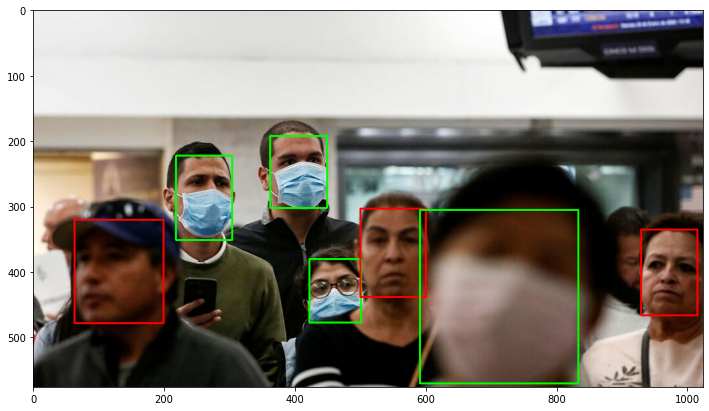

In [46]:
show("./imgs/9.jpg")

[[0.00426514 0.00846676 0.98726815]]
2
wrong_mask
[[1.9123152e-01 8.0875498e-01 1.3545057e-05]]
1
without_mask


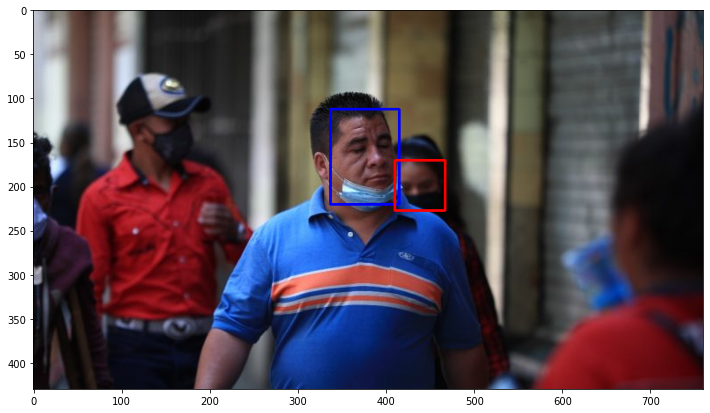

In [47]:
show("./imgs/10.jpg")

[[0.9566002  0.00140897 0.04199093]]
0
with_mask
[[0.01218519 0.98236966 0.00544518]]
1
without_mask
[[0.9762458  0.00905407 0.01470012]]
0
with_mask


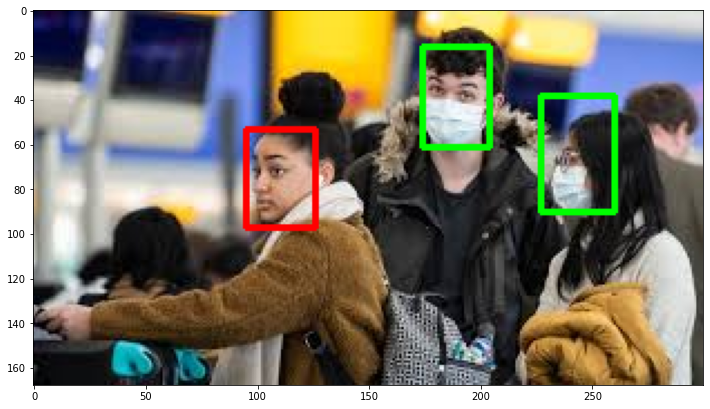

In [48]:
show("./imgs/12.jpg")

[[9.9993896e-01 2.8212760e-06 5.8134883e-05]]
0
with_mask
[[9.999994e-01 3.748497e-08 5.668010e-07]]
0
with_mask
[[9.9999893e-01 7.2590773e-08 9.3850383e-07]]
0
with_mask
[[2.3607961e-04 9.9911803e-01 6.4593687e-04]]
1
without_mask


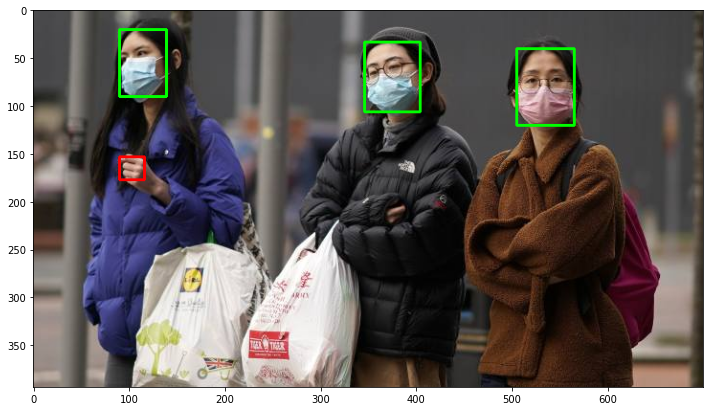

In [49]:
show("./imgs/13.jpg")

[[9.9973351e-01 1.2588232e-06 2.6513869e-04]]
0
with_mask
[[4.9847370e-04 9.8536378e-01 1.4137707e-02]]
1
without_mask
[[9.9973160e-01 1.0436603e-05 2.5792772e-04]]
0
with_mask
[[2.8408808e-04 2.0485809e-03 9.9766731e-01]]
2
wrong_mask
[[0.05028558 0.47222877 0.4774857 ]]
2
wrong_mask
[[0.9920065  0.00148839 0.00650512]]
0
with_mask


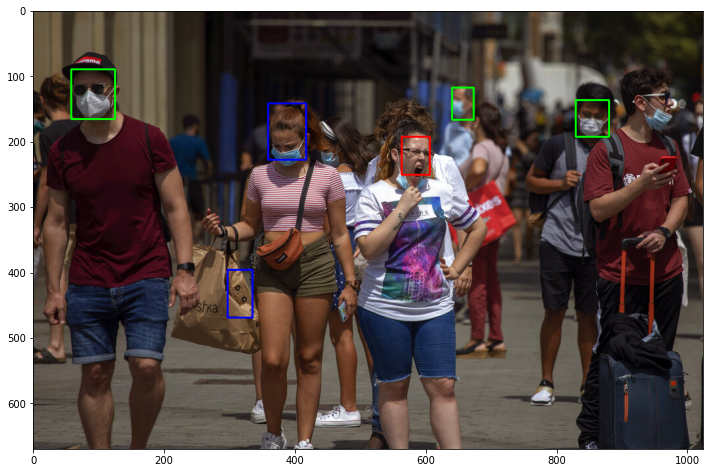

In [50]:
show("./imgs/14.jpg")